
<img src="fga.png" width="1200" height="400">


<h1><center>Aula Extra 1 - Leitura de Dados e Exploratory Data Analysis (EDA)
</center></h1>

Sempre que iniciamos um projeto de aprendizado de máquina (ML) ou modelagem estatística, precisamos primeiro fazer uma análise exploratória de dados (EDA). Isso inclui coisas como: plotagens de dados brutos, histogramas e muito mais ...

<ul>
    <li> <b>Sinais Financeiros - UnB</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li> </a>
    <li> <b>25/08/2020</b> </li>
</ul>


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol> 
        <li><a href="#Leitura 1">Leitura de preços - Yahoo Finance</a></li>
        <li><a href="#Leitura 2">Leitura de preços - Dados Pagos</a></li>
        <li><a href="#Leitura 3">Leitura de preços - MetaTrader</a></li>
        <li><a href="#Graficos"> Representações Gráficas do preço e do retorno </a></li>
    </ol>
</div>
<br>
<hr>

<h2>Bibliotecas de Refência</h2>

In [1]:
from urllib.parse import urlencode
import pandas as pd
from pandas_datareader import data
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns


<div id="Leitura 1">
    <h2>1) Leitura de preços - Método 1: Yahoo Finance</h2>
</div>

In [2]:
start_date = '2019-08-24'
end_date = '2020-08-24'
N=5

df = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBOV&idioma=pt-br')
symbols=list(df[0]['Código'].values)
Symbols=[sy+'.SA' for sy in symbols]
print("Ativos =",len(symbols))

output = None

for sy in tqdm(Symbols[:N]): 
    try: 
        stock=data.DataReader(sy, 'yahoo',  start_date,  end_date)["Adj Close"]
        
        if output is None:
            df = stock
            output = df          
        else:
            df = stock
            output=pd.concat([output,df],axis=1)         
    except:
        print("Erro "+sy)
output.columns=symbols[:N] 
output.head()

  0%|          | 0/5 [00:00<?, ?it/s]

Ativos = 76


100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


ABEV3      AZUL4      B3SA3      BBAS3      BBDC3
Date                                                             
2019-08-26  17.627039  46.000000  41.199295  42.816544  26.663210
2019-08-27  17.704992  45.980000  41.881088  42.472019  26.996145
2019-08-28  17.685503  46.540001  42.494690  42.117924  26.843945
2019-08-29  18.075266  48.549999  43.137520  43.141922  27.700062
2019-08-30  18.240915  47.099998  43.634251  44.252056  28.822519

In [3]:
output.describe()

ABEV3       AZUL4       B3SA3       BBAS3       BBDC3
count  248.000000  248.000000  248.000000  248.000000  248.000000
mean    15.555395   36.988105   47.239685   39.129097   25.329834
std      2.686739   17.686745    7.761579    8.252405    6.117987
min     11.030000   10.350000   30.119844   21.833149   15.608601
25%     13.202500   20.467500   42.790500   32.475947   19.487500
50%     15.724999   45.574999   46.376091   42.489058   27.088340
75%     18.214121   53.212500   49.425703   46.314159   31.231129
max     19.219999   62.410000   67.400002   52.341339   35.164368

In [4]:
output.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2019-08-26 to 2020-08-24
Data columns (total 5 columns):
ABEV3    248 non-null float64
AZUL4    248 non-null float64
B3SA3    248 non-null float64
BBAS3    248 non-null float64
BBDC3    248 non-null float64
dtypes: float64(5)
memory usage: 11.6 KB


<AxesSubplot:ylabel='Date'>

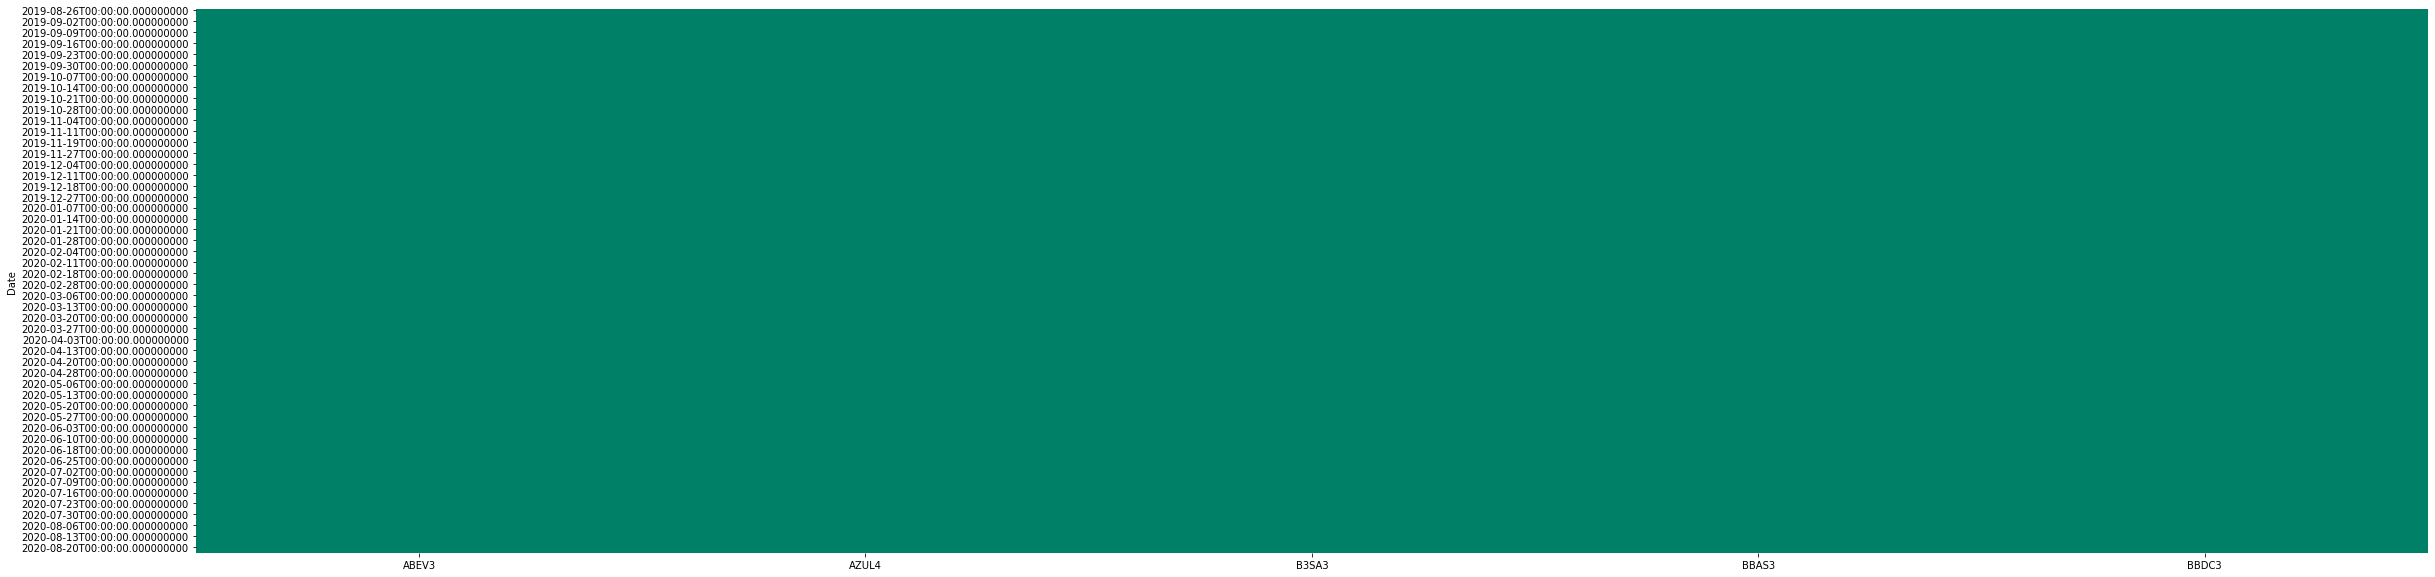

In [5]:
%matplotlib inline 
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')

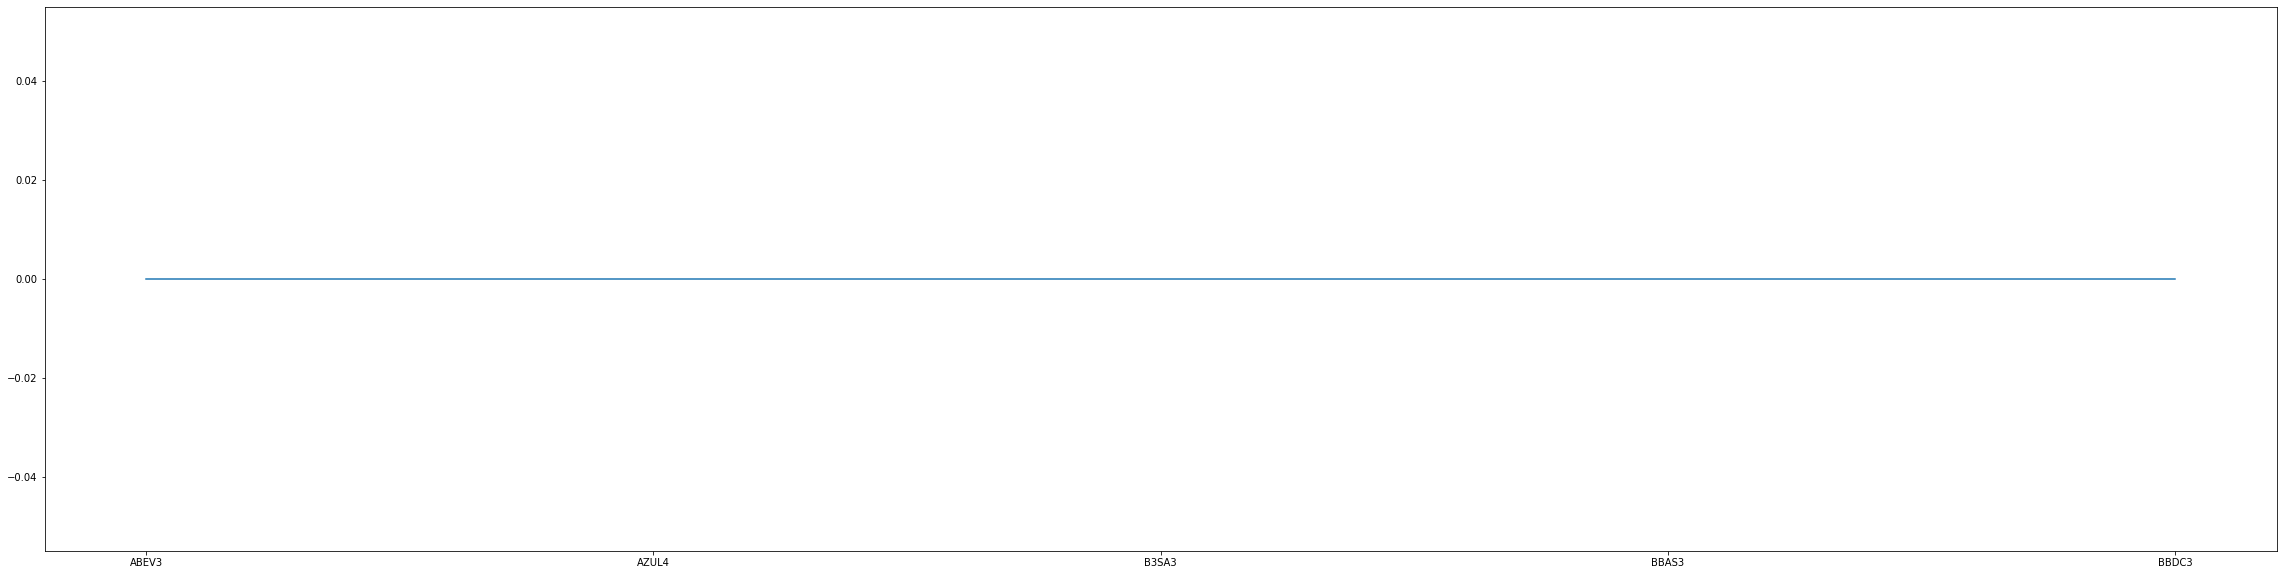

In [6]:
plt.figure(figsize=(40,10))
plt.plot(symbols[:N] ,output.isnull().sum().values)

<AxesSubplot:xlabel='Date'>

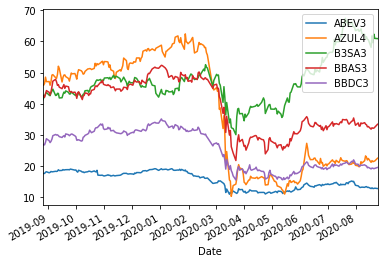

In [7]:
output[output.columns[:5]].plot()

<div id="Leitura 2">
    <h2>2) Leitura de preços - Método 2: Dados Pagos</h2>
</div>

In [8]:
from os import listdir
from os.path import isfile, join

dir_data='./data_csv/'
csvs = [f for f in listdir(dir_data) if isfile(join(dir_data, f)) and f.endswith("csv")]
len(csvs)

140

/opt/jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



<AxesSubplot:ylabel='index'>

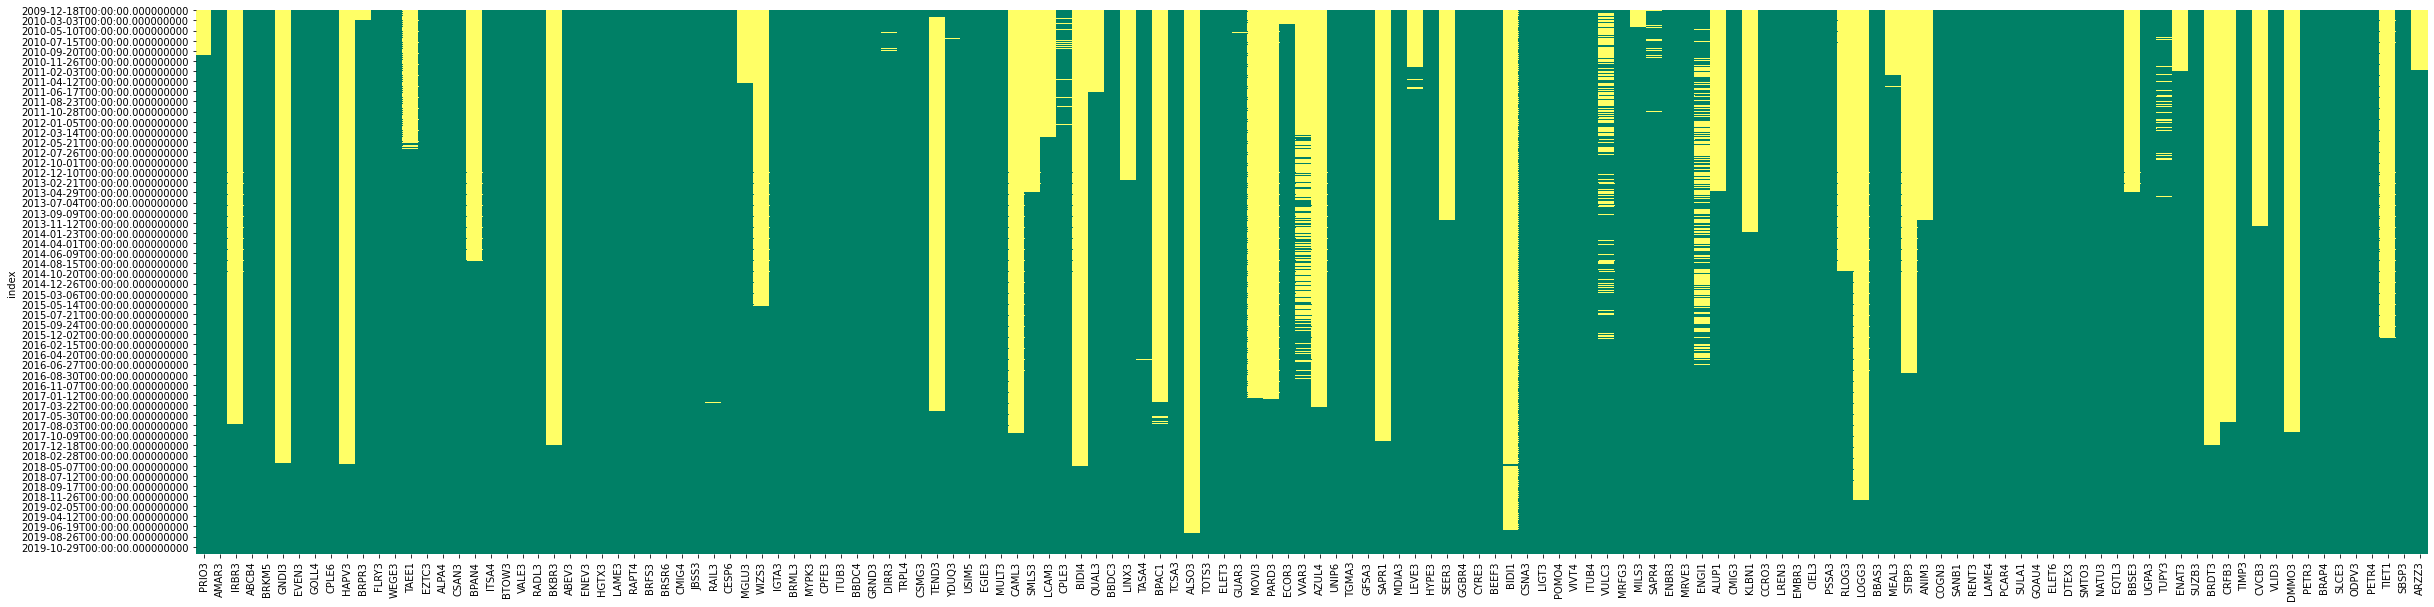

In [9]:
li = []
for csv in csvs:
    df = pd.read_csv(dir_data+csv, index_col=None, header=None)
    li.append(df[[0,4]][1:])

output = None

for i in range(len(li)):

    if output is None:
        df = li[i]
        df.columns=['date',csvs[i][0:5]]
   #     df['date']=[pd.to_datetime(df['date'].iloc[i][:10], format='%d/%m/%Y') for i in range(len(df))]
        df=df.set_index('date')
        output=df

    else:
        df = li[i]
        df.columns=['date',csvs[i][0:5]]
    #    
        df=df.set_index('date')
        output=pd.concat([output,df],axis=1) 
output.reset_index( inplace=True)        
output['index']=[pd.to_datetime(output['index'].iloc[i][:10], format='%d/%m/%Y') for i in range(len(output))]        
output=output.sort_values(by='index')
output=output.set_index('index')
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')

In [10]:
output.head()

PRIO3 AMAR3 IRBR3 ABCB4  BRKM5 GNDI3 EVEN3  GOLL4  CPLE6 HAPV3  \
index                                                                       
2009-12-18   NaN  8.65   NaN  6.18   9.24   NaN  6.29  23.43  24.34   NaN   
2009-12-21   NaN  8.65   NaN  6.23   9.59   NaN  6.21  23.38  24.87   NaN   
2009-12-22   NaN  8.77   NaN  6.33  10.12   NaN  6.22  24.50  24.67   NaN   
2009-12-23   NaN  8.80   NaN  6.31  10.00   NaN  6.20  25.18  24.59   NaN   
2009-12-28   NaN  8.72   NaN  6.23   9.70   NaN  6.35  24.79  24.14   NaN   

            ...  VLID3 DMMO3  PETR3  BRAP4 SLCE3 ODPV3  PETR4 TIET1 SBSP3  \
index       ...                                                             
2009-12-18  ...  10.41   NaN  35.02  22.85  5.71  2.68  28.34   NaN  8.39   
2009-12-21  ...  10.50   NaN  34.22  22.77  5.79  2.75  27.42   NaN  8.39   
2009-12-22  ...  10.61   NaN  34.90  23.16  5.81  2.86  28.31   NaN  8.47   
2009-12-23  ...  10.67   NaN  35.03  23.45  5.80  2.92  28.59   NaN  8.39   
2009-12-28  ...  10.69   NaN  35.03  23.58  5.87  2.99  28.63   NaN  8.47   

           ARZZ3  
index             
2009-12-18   NaN  
2009-12-21   NaN  
2009-12-22   NaN  
2009-12-23   NaN  
2009-12-28   NaN  

[5 rows x 140 columns]

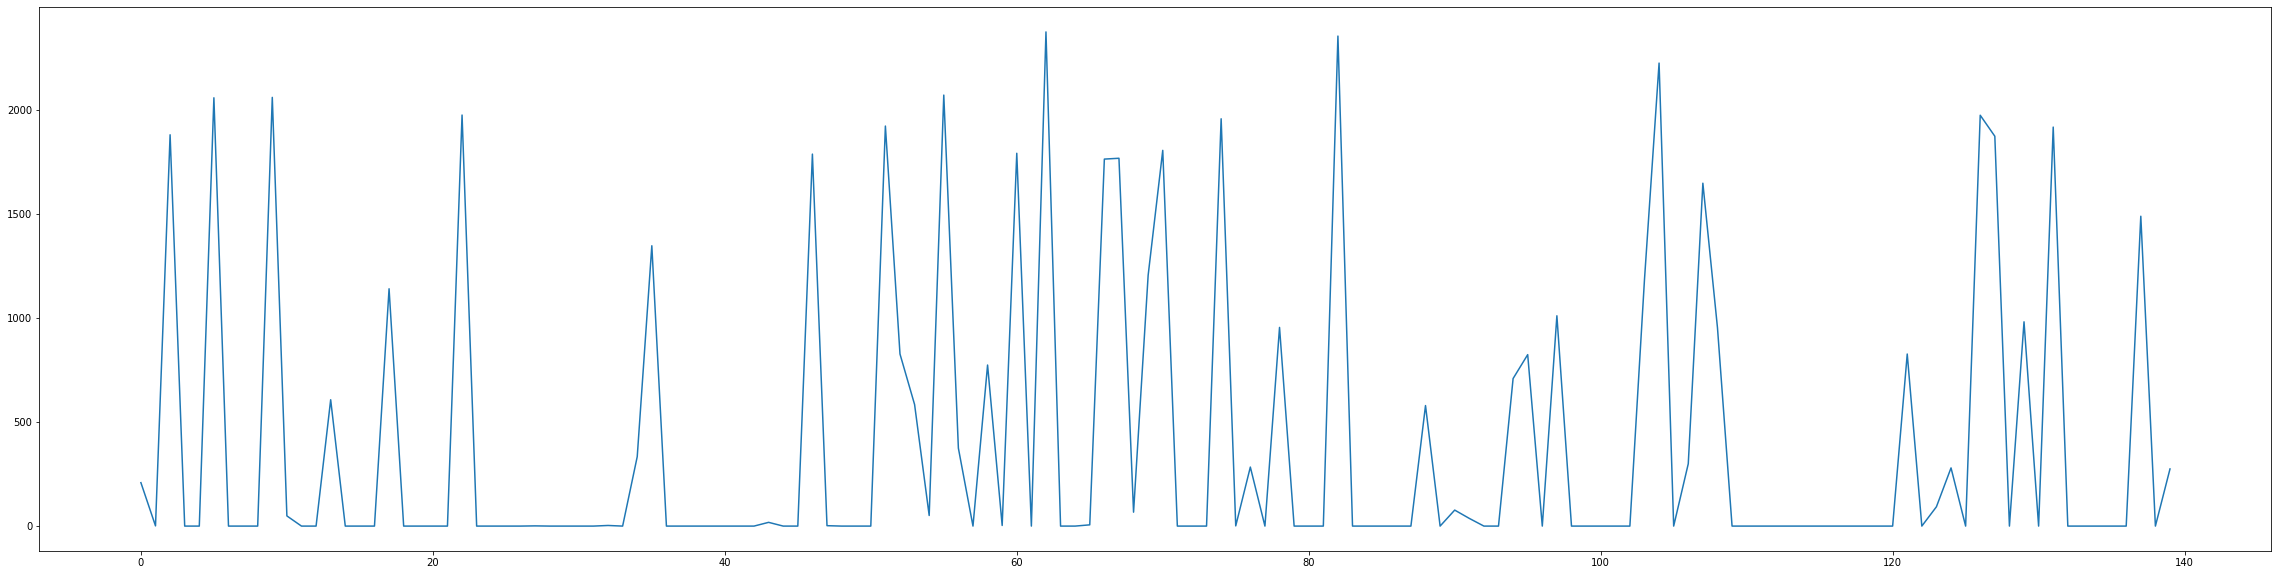

In [11]:
plt.figure(figsize=(40,10))
plt.plot(output.isnull().sum().values)

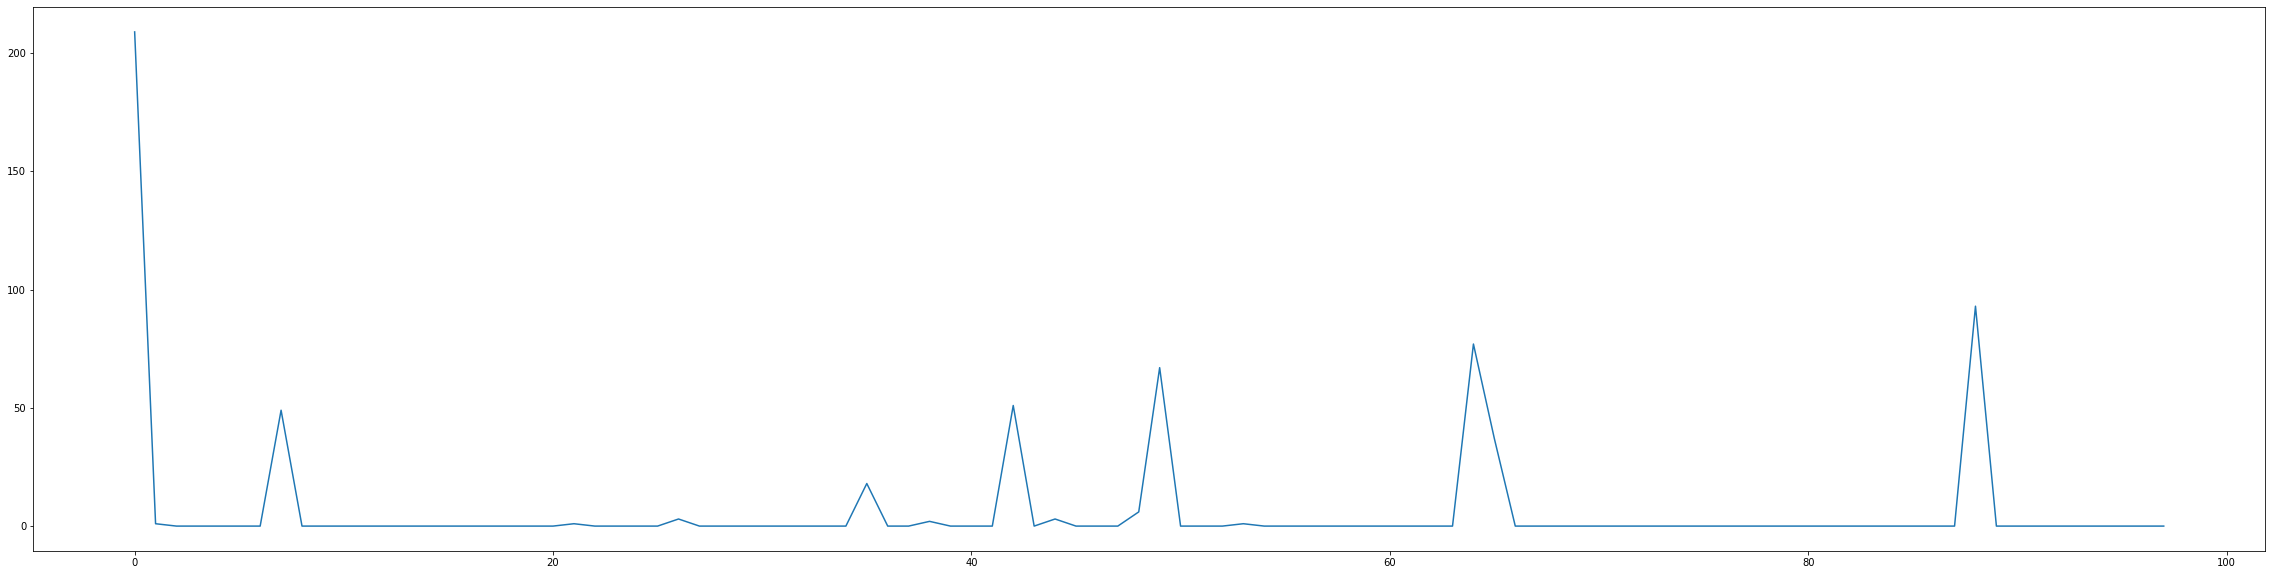

In [12]:
cols_remove=list(output.columns[output.isnull().sum()>0.1*len(output)])
output.drop(cols_remove, axis=1,inplace=True)
plt.figure(figsize=(40,10))
plt.plot(output.isnull().sum().values)

<AxesSubplot:ylabel='index'>

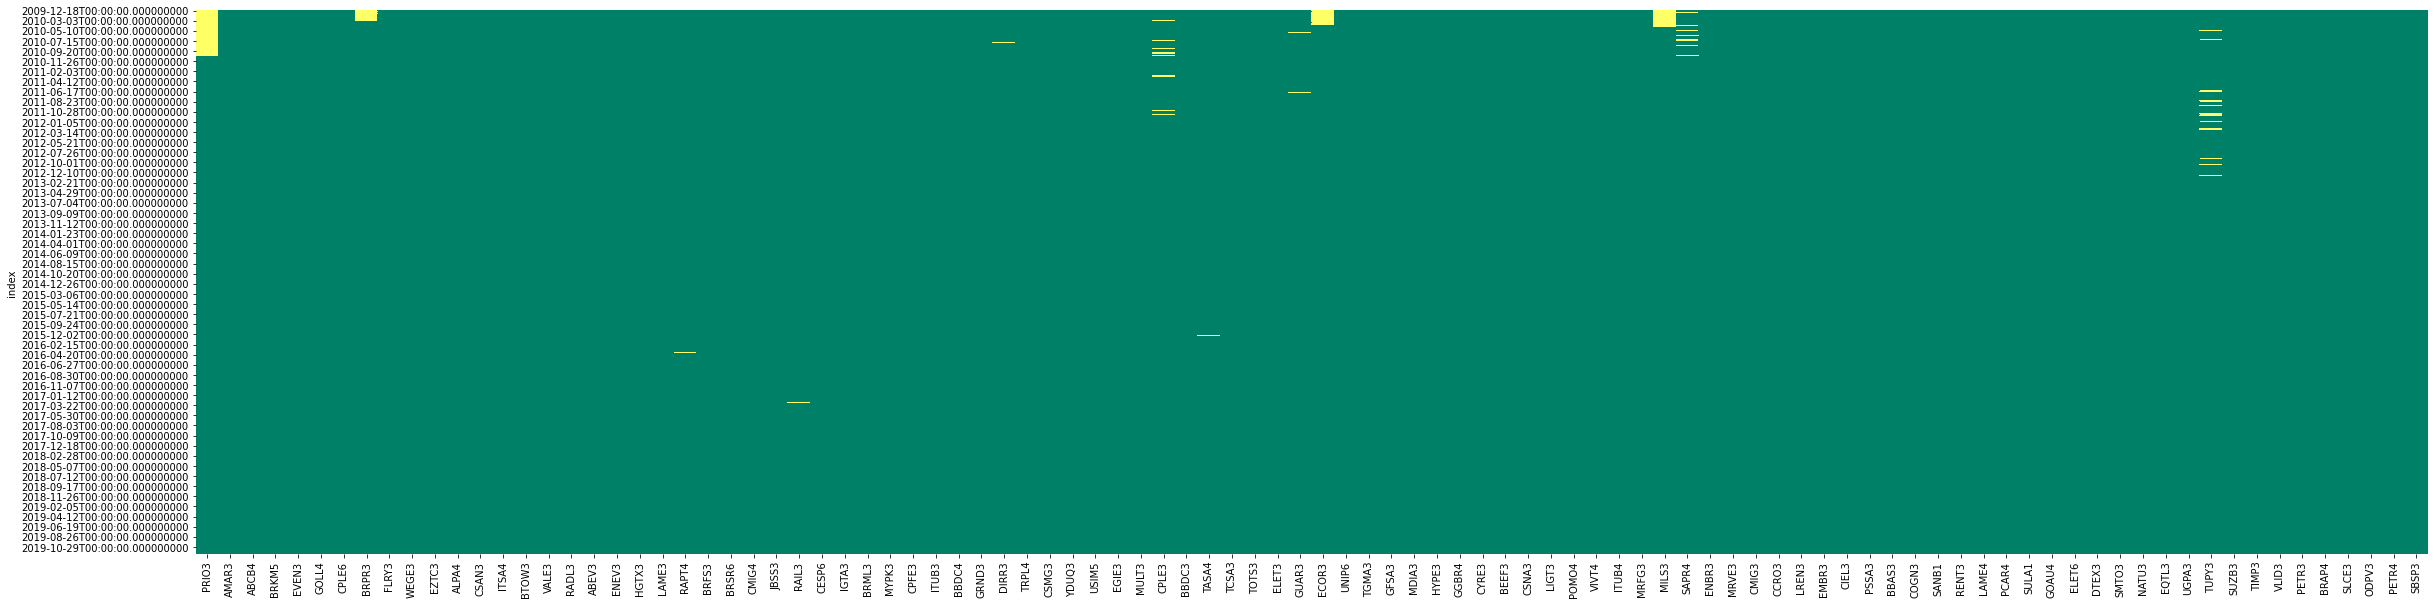

In [13]:
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')

['Erros', 0, 'Ativos', 83]

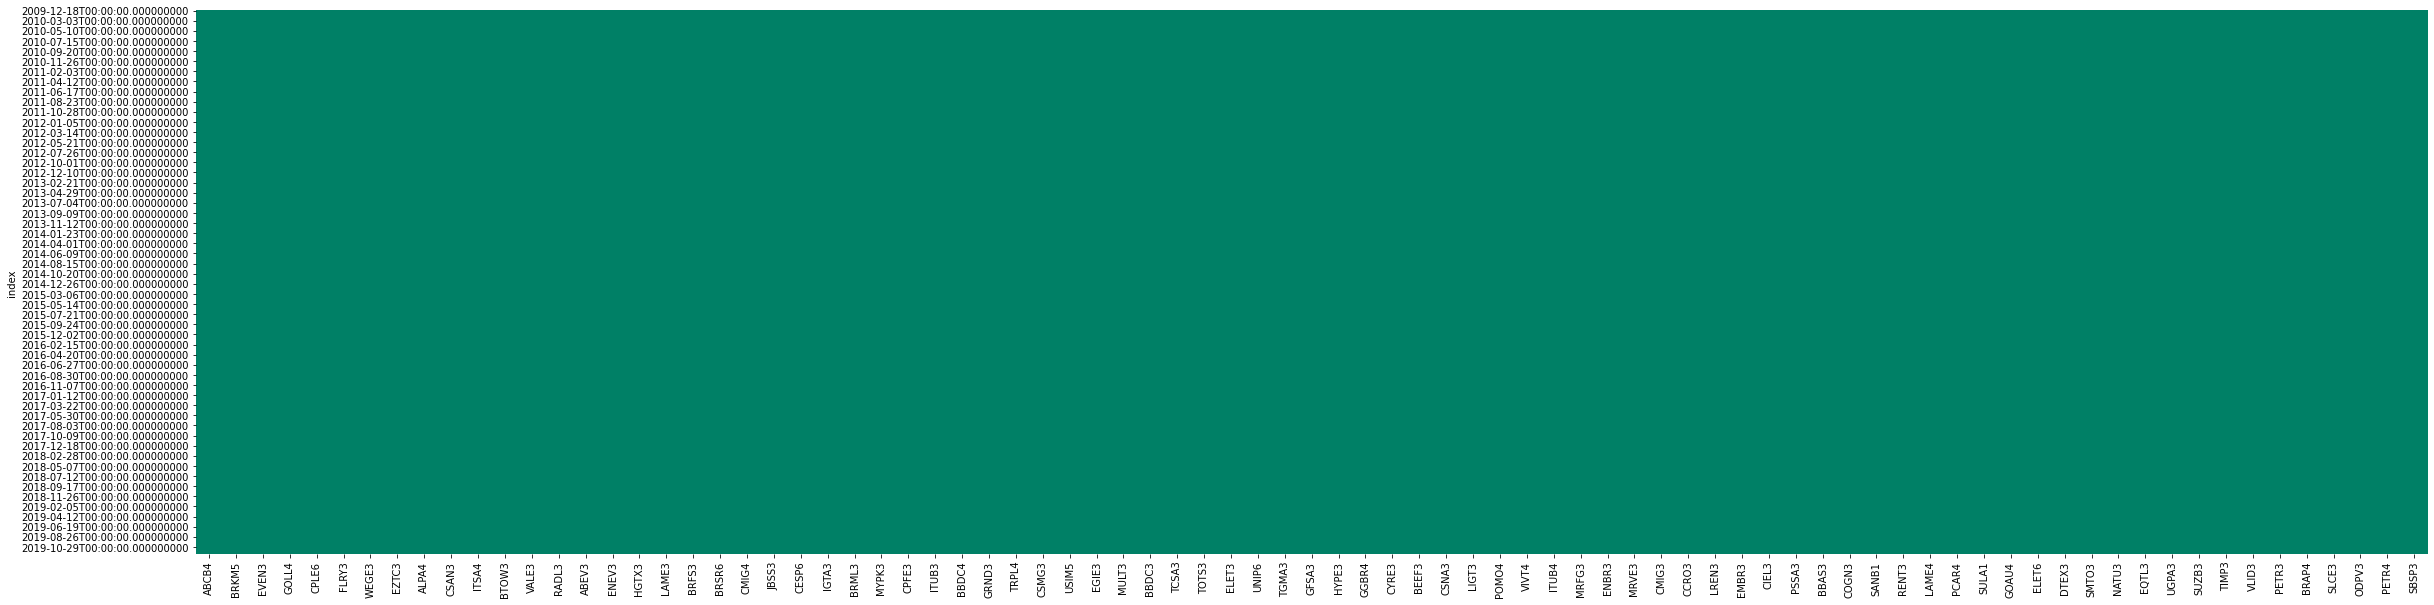

In [14]:
import numpy as np
output=output.dropna(axis='columns')
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

<div id="Leitura 3">
    <h2>3) Leitura de preços - Método 3: MetaTrader</h2>
</div>

In [15]:
dir_data='./data_mt5/'
csvs = [f for f in listdir(dir_data) if isfile(join(dir_data, f)) and f.endswith("csv")]
li = []
import csv
from csv import reader
print(csv.__file__)
output = None


for csv in csvs:
    price=[]
    with open(dir_data+csv, 'r', encoding="utf16") as csvfile:
        readCSV = reader(csvfile, delimiter=',')
        for row in readCSV:
            price.append([row[0].split('\t')[0][0:10],row[0].split('\t')[1]])
        df=pd.DataFrame(price)
        df.columns=['data',csv[:-4]]
        df=df.set_index('data')

        if output is None:
            output=df
        else:
            output=pd.concat([output,df],axis=1) 

output=output.astype(float)    
output[["PETR3","GGBR4","LAME4","WEGE3"]].dropna().tail()

/usr/lib/python3.6/csv.py


/opt/jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



PETR3  GGBR4  LAME4  WEGE3
2020.08.19  23.53  20.01  32.81  66.15
2020.08.20  23.23  20.29  32.82  67.00
2020.08.21  23.03  19.62  33.09  67.45
2020.08.24  23.54  19.56  32.82  66.75
2020.08.25  23.32  19.57  33.05  68.30

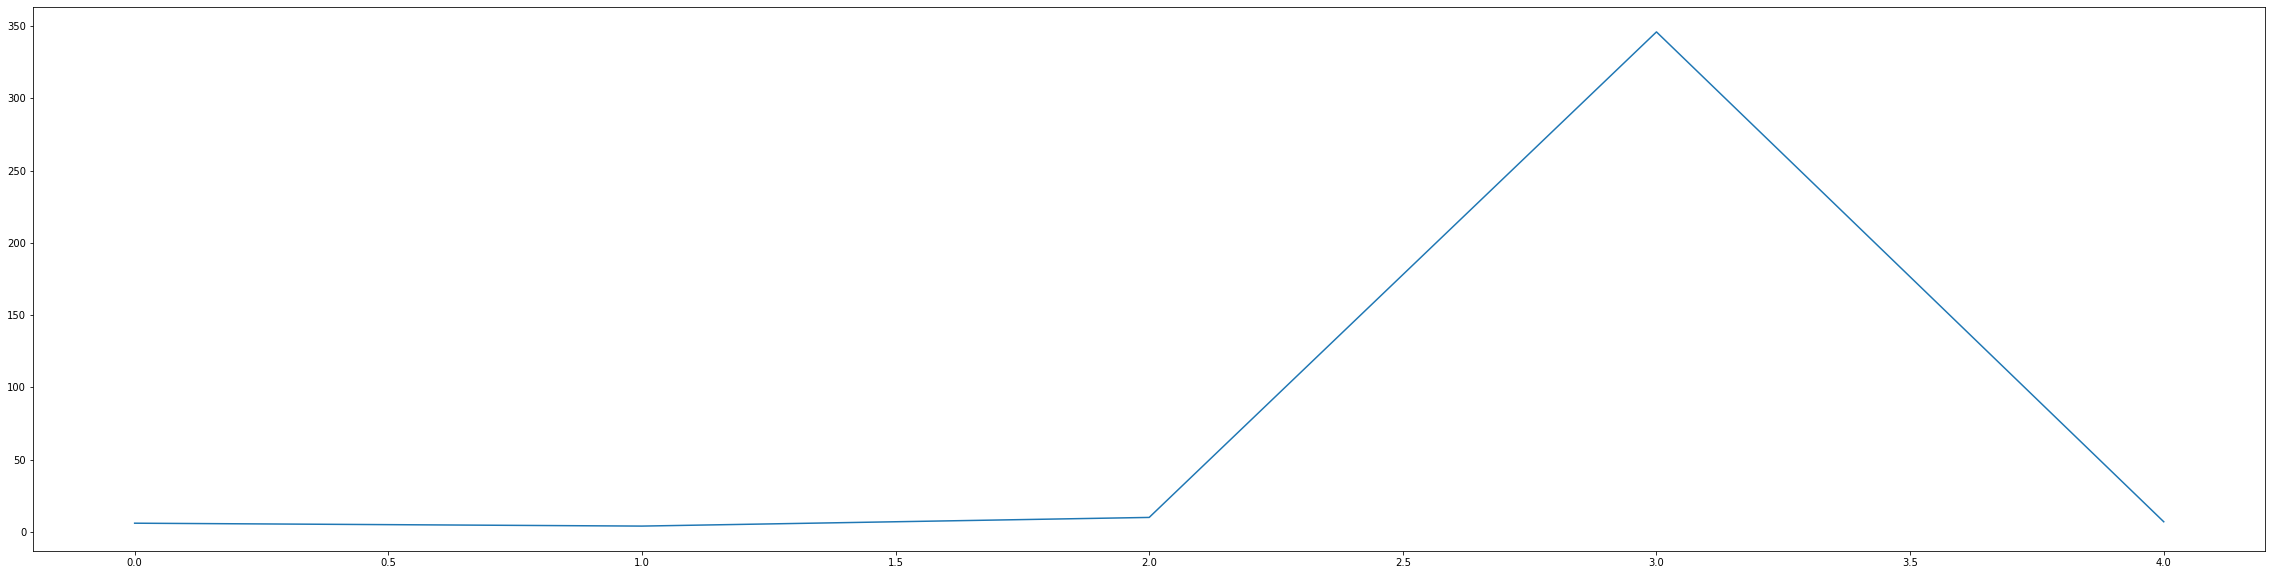

In [16]:
plt.figure(figsize=(40,10))
plt.plot(output.isnull().sum().values)

['Erros', 373, 'Ativos', 5]

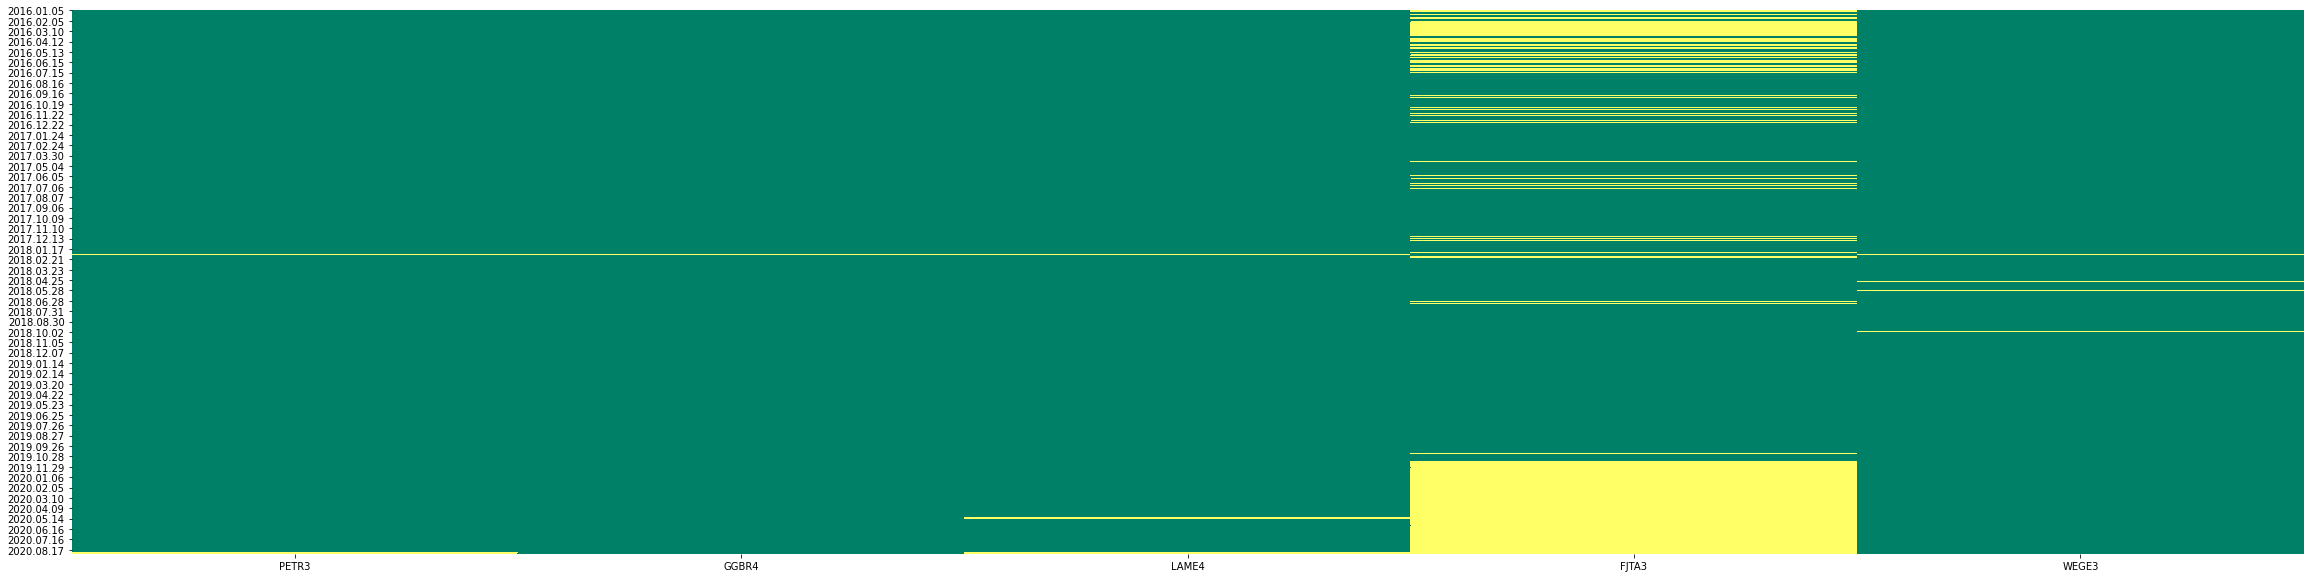

In [17]:
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

In [18]:
output.to_excel("output.xlsx")

<div id="Graficos">
    <h2>4) Representações Gráficas do preço e do retorno</h2>
</div>

In [19]:
start_date = '2019-08-24'
end_date = '2020-08-24'
N=20

df = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBOV&idioma=pt-br')
symbols=list(df[0]['Código'].values)
Symbols=[sy+'.SA' for sy in symbols]
print("Ativos =",len(symbols))

output = None

for sy in tqdm(Symbols[:N]): 
    try: 
        stock=data.DataReader(sy, 'yahoo',  start_date,  end_date)["Adj Close"]
        
        if output is None:
            df = stock
            output = df          
        else:
            df = stock
            output=pd.concat([output,df],axis=1)         
    except:
        print("Erro "+sy)
output.columns=symbols[:N] 
output.head()

  0%|          | 0/20 [00:00<?, ?it/s]

Ativos = 76


100%|██████████| 20/20 [00:20<00:00,  1.00s/it]


ABEV3      AZUL4      B3SA3      BBAS3      BBDC3      BBDC4  \
Date                                                                           
2019-08-26  17.627039  46.000000  41.199295  42.816544  26.663210  29.575752   
2019-08-27  17.704992  45.980000  41.881088  42.472019  26.996145  29.949657   
2019-08-28  17.685503  46.540001  42.494690  42.117924  26.843945  29.772049   
2019-08-29  18.075266  48.549999  43.137520  43.141922  27.700062  30.332901   
2019-08-30  18.240915  47.099998  43.634251  44.252056  28.822519  30.800282   

                BBSE3    BEEF3     BPAC11      BRAP4      BRDT3      BRFS3  \
Date                                                                         
2019-08-26  28.291243  7.95485  44.948189  26.390278  26.172894  37.880001   
2019-08-27  28.486479  7.99419  53.027435  26.341297  26.370745  38.009998   
2019-08-28  28.850323  8.09252  52.042160  26.801708  26.804132  39.090000   
2019-08-29  29.178675  8.34817  55.185184  27.879261  27.133886  38.869999   
2019-08-30  28.992313  8.34817  56.209869  27.849874  27.133886  38.139999   

                BRKM5  BRML3      BTOW3      CCRO3     CIEL3      CMIG4  \
Date                                                                      
2019-08-26  25.618366  13.55  41.060001  14.928202  7.229743  13.788247   
2019-08-27  25.404394  13.65  41.330002  15.089948  7.150512  13.874603   
2019-08-28  27.038364  13.79  44.410000  15.099463  7.190128  13.452417   
2019-08-29  28.147133  13.79  45.759998  15.603728  7.417914  13.874603   
2019-08-30  27.446857  13.48  47.000000  15.461012  7.675412  14.162458   

                COGN3      CPFE3  
Date                              
2019-08-26   9.845451  28.555229  
2019-08-27   9.755493  28.599569  
2019-08-28   9.855446  28.439943  
2019-08-29  10.185293  28.555229  
2019-08-30  10.075345  28.732592

In [20]:
output.corr().mean()

ABEV3     0.664900
AZUL4     0.670411
B3SA3     0.269617
BBAS3     0.704775
BBDC3     0.665843
BBDC4     0.660792
BBSE3     0.715356
BEEF3     0.260553
BPAC11    0.532524
BRAP4     0.345298
BRDT3     0.730467
BRFS3     0.605280
BRKM5     0.684576
BRML3     0.674025
BTOW3    -0.082072
CCRO3     0.727068
CIEL3     0.622481
CMIG4     0.693005
COGN3     0.712848
CPFE3     0.581446
dtype: float64

In [21]:
output.pct_change().corr().mean()

ABEV3     0.561051
AZUL4     0.607481
B3SA3     0.645965
BBAS3     0.690949
BBDC3     0.679237
BBDC4     0.670388
BBSE3     0.564041
BEEF3     0.340107
BPAC11    0.622858
BRAP4     0.538556
BRDT3     0.651531
BRFS3     0.516190
BRKM5     0.582851
BRML3     0.606474
BTOW3     0.518342
CCRO3     0.660020
CIEL3     0.504213
CMIG4     0.656220
COGN3     0.580785
CPFE3     0.605028
dtype: float64

In [22]:
class report(object):
    def grafic_01(output,ativo):
            fig=plt.figure(figsize=(20,5));
            stock_return = output[ativo].pct_change()
            vol=100*stock_return.rolling(12).std() * np.sqrt(12)
            ax=vol.plot(x_compat=True,style='m',label='Volatilidade', title=ativo);
            plt.ylabel("Volatilidade [%]")
            output[ativo].plot(x_compat=True, secondary_y=True, style='y--',label='Volume');
            ax.right_ax.set_ylabel('Preço')
            fig.tight_layout()
            plt.grid(False)
            pass
    def grafic_02(output,ativo):
            fig=plt.figure(figsize=(20,5));
            ax = fig.add_subplot(111)
            stock_return=100*output[ativo].pct_change()
            stock_return.hist(bins=len(output), density = True,color='c')
            stock_return.plot(kind = "kde")
            plt.axvline(stock_return.mean(), color='k', linestyle='dashed', linewidth=2)            
            plt.title(ativo+': RMD = '+str(round(stock_return.mean(),2))+'% e '+'SMD = '
                      +str(round(stock_return.std(),2))+'%',fontsize=16)  
            ax.grid(False)
            ax.set_xlabel("Retorno Diário [%]", fontsize=12)
            ax.set_ylabel("Densidade", fontsize=12)
            fig.tight_layout()
            pass
    def grafic_03(output,ativo1,ativo2):
            ativo1_close_return=100*output[ativo1].pct_change().dropna()
            ativo2_close_return=100*output[ativo2].pct_change().dropna()        
            X = ativo1_close_return
            X = sm.add_constant(X)
            y = ativo2_close_return
            model = sm.OLS(y,X).fit()
            beta = model.params[1]
            alpha = model.params[0]
            fig, ax1 = plt.subplots(1,figsize=(5,5))
            ax1.scatter(X[X.columns[1]],y,label="Retorno Diário", color='blue', edgecolors='none', alpha=0.7)
            X_prime_0 = np.linspace(X[X.columns[1]].min(),X[X.columns[1]].max(), 100)
            X_prime = sm.add_constant(X_prime_0)
            y_hat = model.predict(X_prime)
            ax1.scatter(X_prime_0,y_hat,label="Retorno Diário", color='red', edgecolors='none', alpha=0.5)
            ax1.grid(True)
            ax1.set_xlabel("Retorno Diário "+ativo1+" [%]",fontsize=16)
            ax1.set_ylabel("Retorno Diário "+ativo2+" [%]", fontsize=16)
            ax1.set_title("Alpha = "+str(round(alpha,2))+", Beta = "+str(round(beta,2)), fontsize=16)
            pass
    def grafic_04(output):
            fig = plt.figure(figsize=(20, 5))
            ax = fig.add_subplot(111)
            bp = ax.boxplot(output.values)
            pass
    def grafic_05(output):
            sns.pairplot(output)
            pass

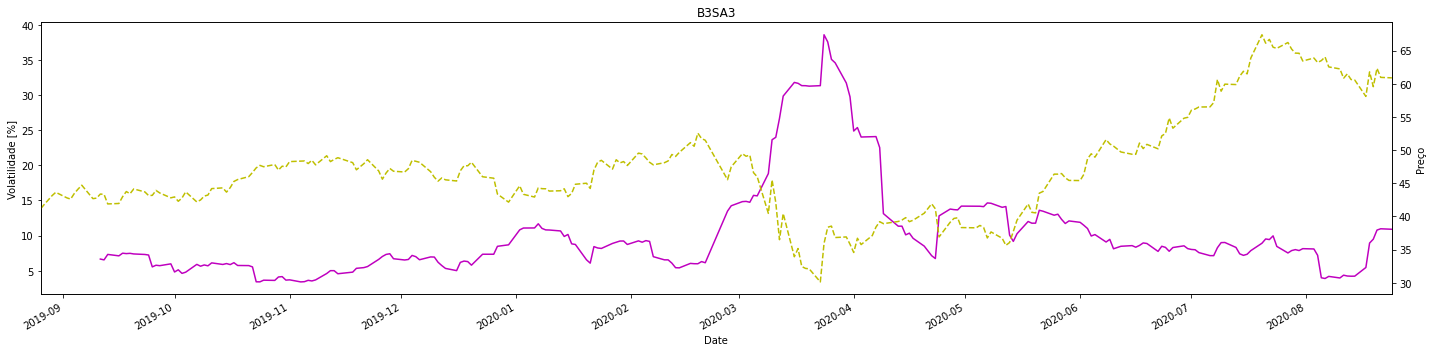

In [23]:
%matplotlib inline 
report.grafic_01(output,'B3SA3')

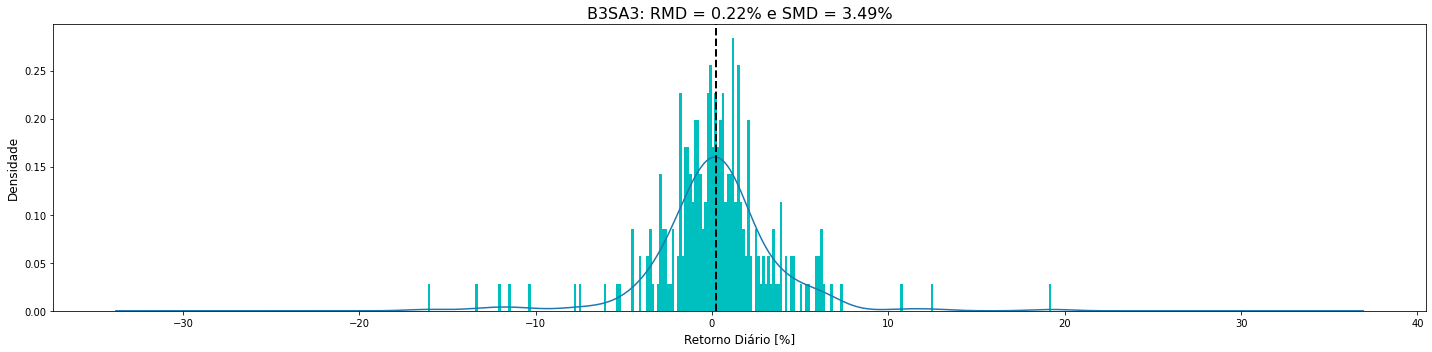

In [24]:
%matplotlib inline 
report.grafic_02(output,'B3SA3')

/opt/jupyterhub/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


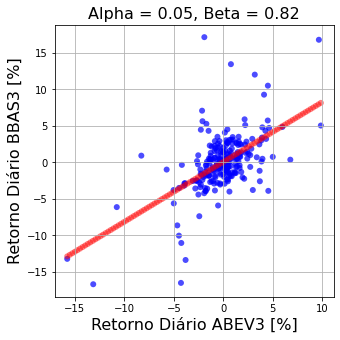

In [25]:
%matplotlib inline 
import statsmodels.api as sm
report.grafic_03(output,'ABEV3','BBAS3')

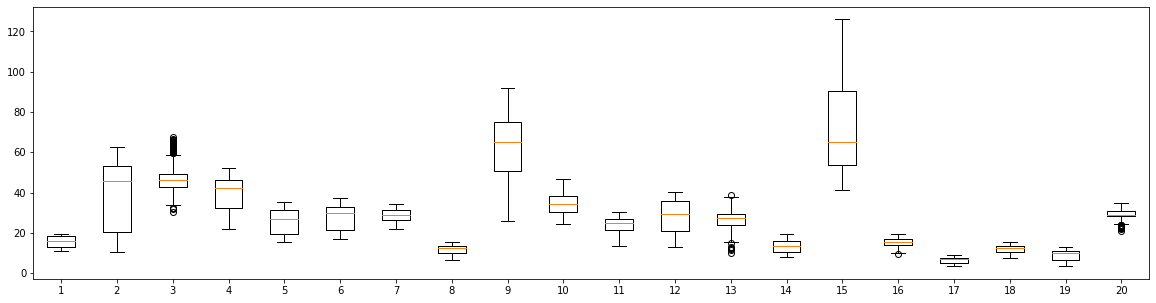

In [26]:
%matplotlib inline 
report.grafic_04(output)

In [27]:
output.columns

Index(['ABEV3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3', 'BEEF3',
       'BPAC11', 'BRAP4', 'BRDT3', 'BRFS3', 'BRKM5', 'BRML3', 'BTOW3', 'CCRO3',
       'CIEL3', 'CMIG4', 'COGN3', 'CPFE3'],
      dtype='object')

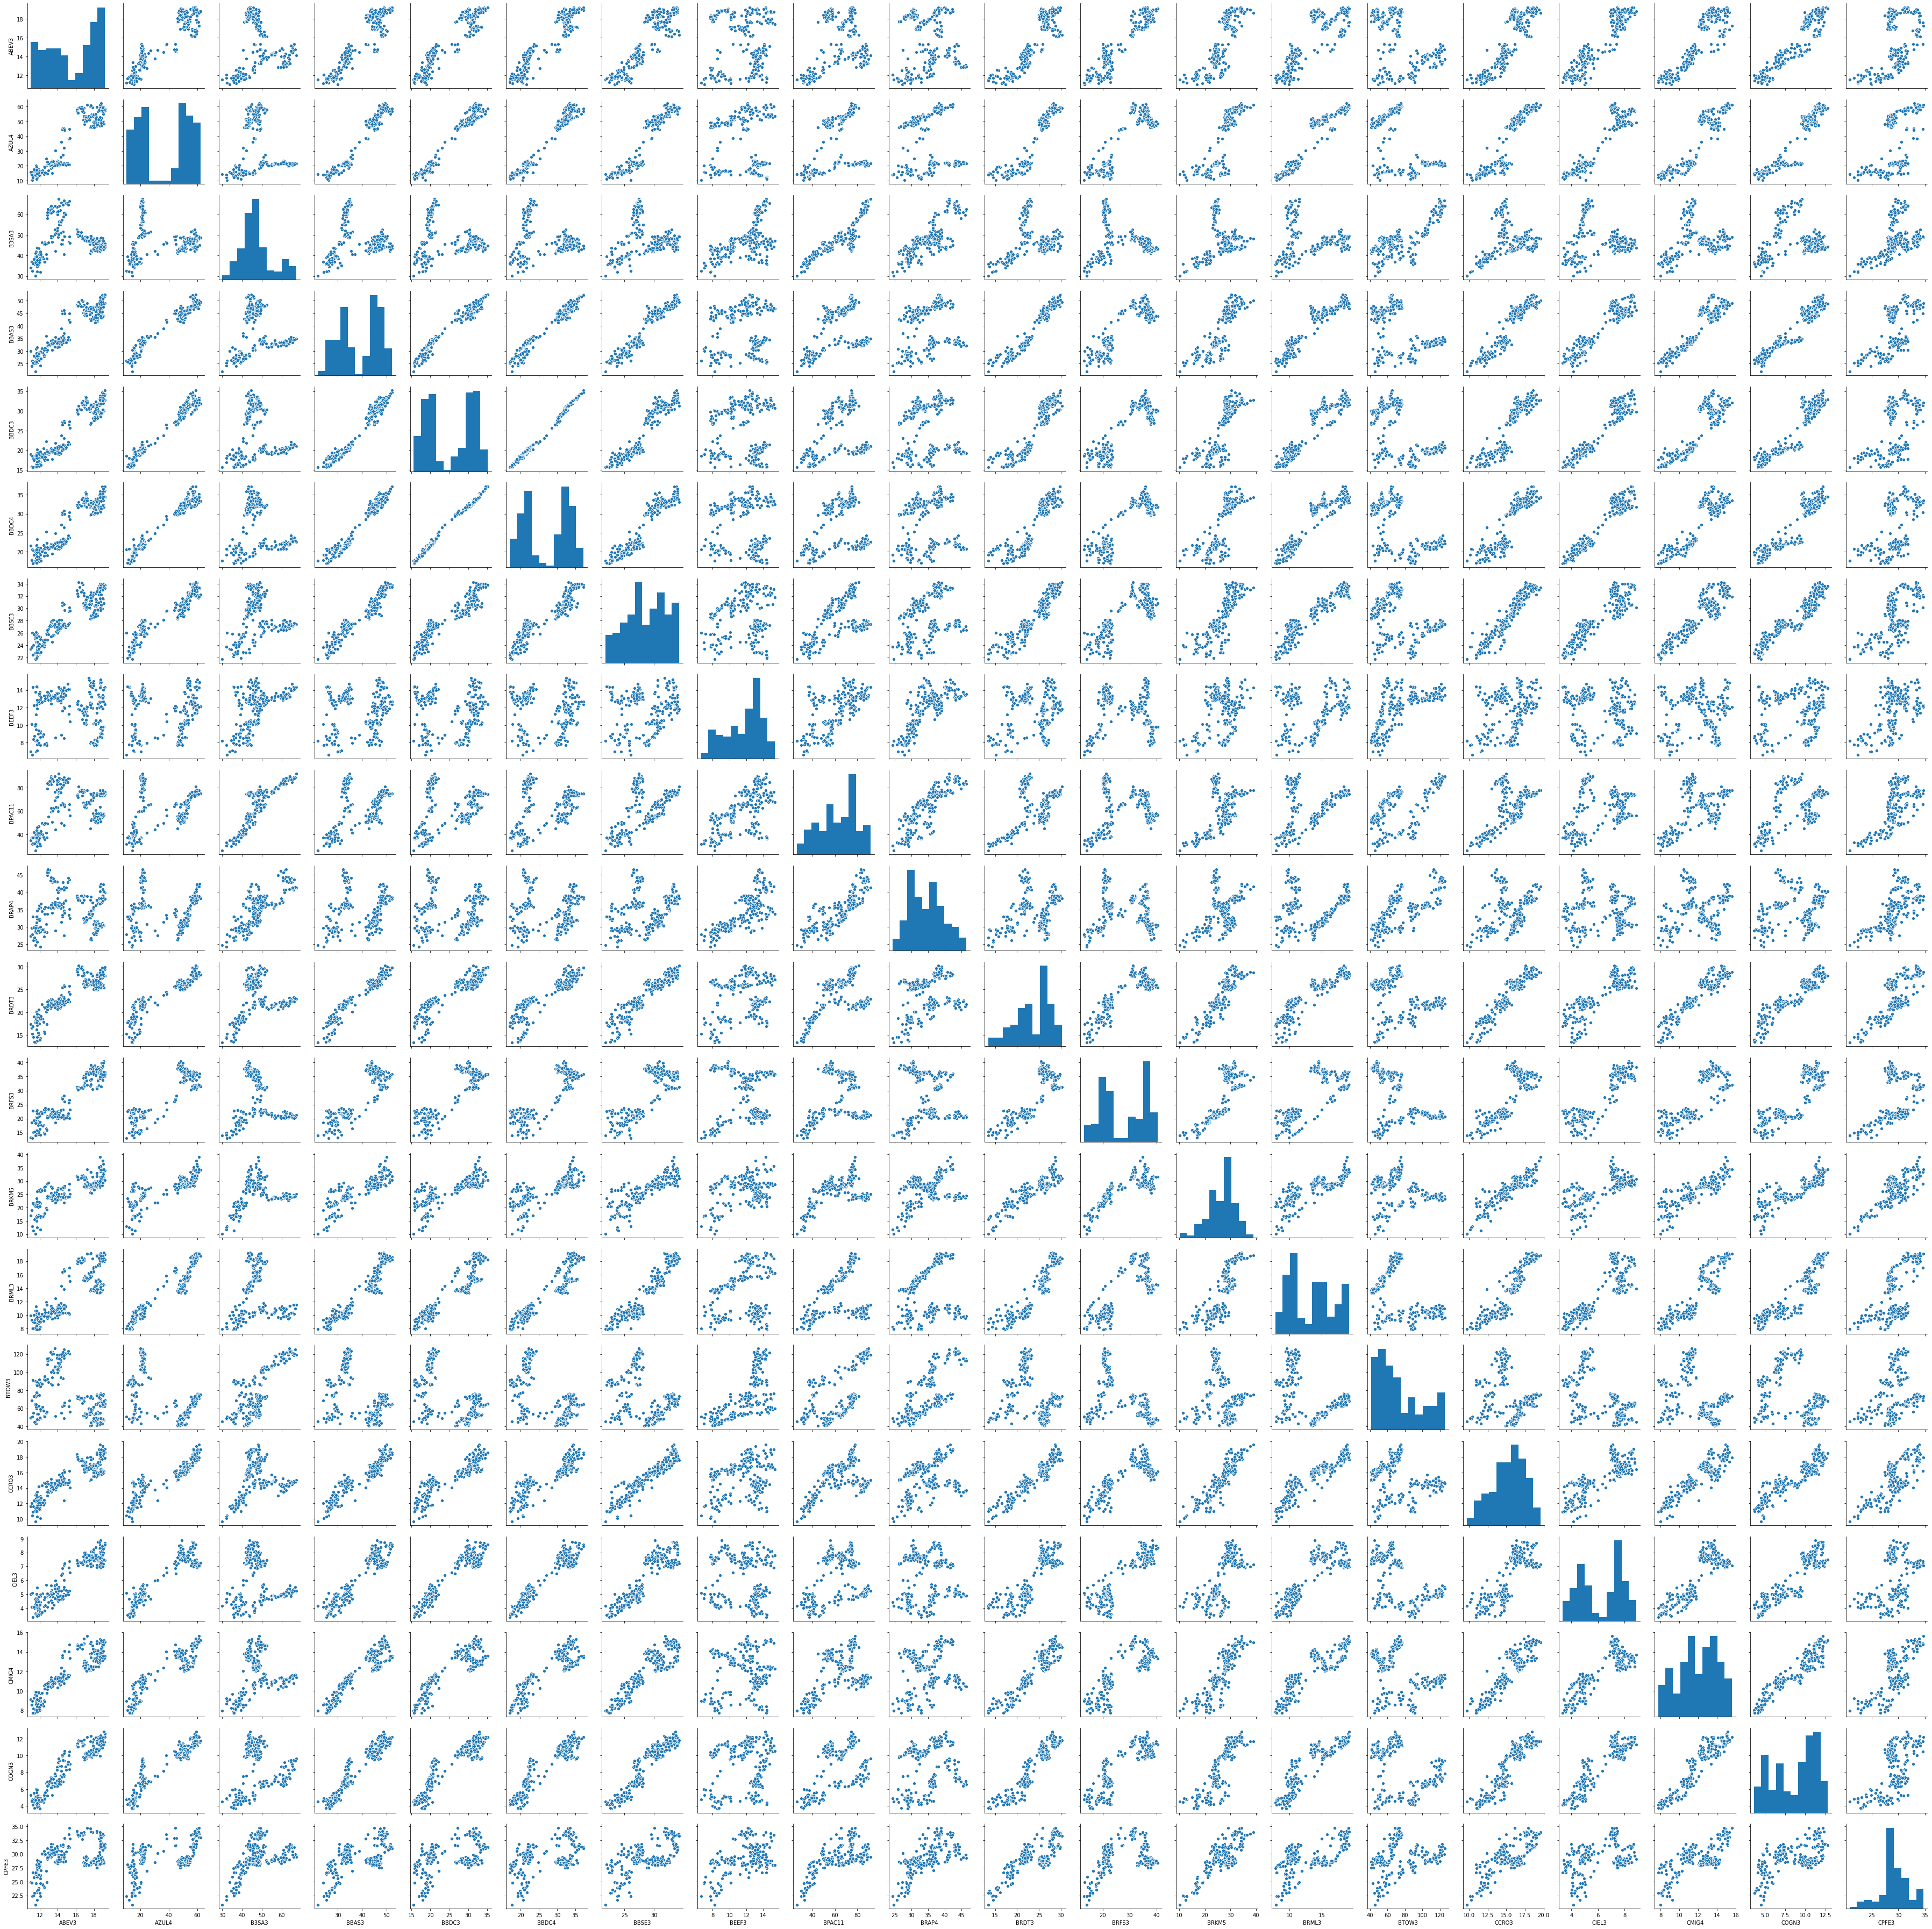

In [28]:
%matplotlib inline 
report.grafic_05(output)

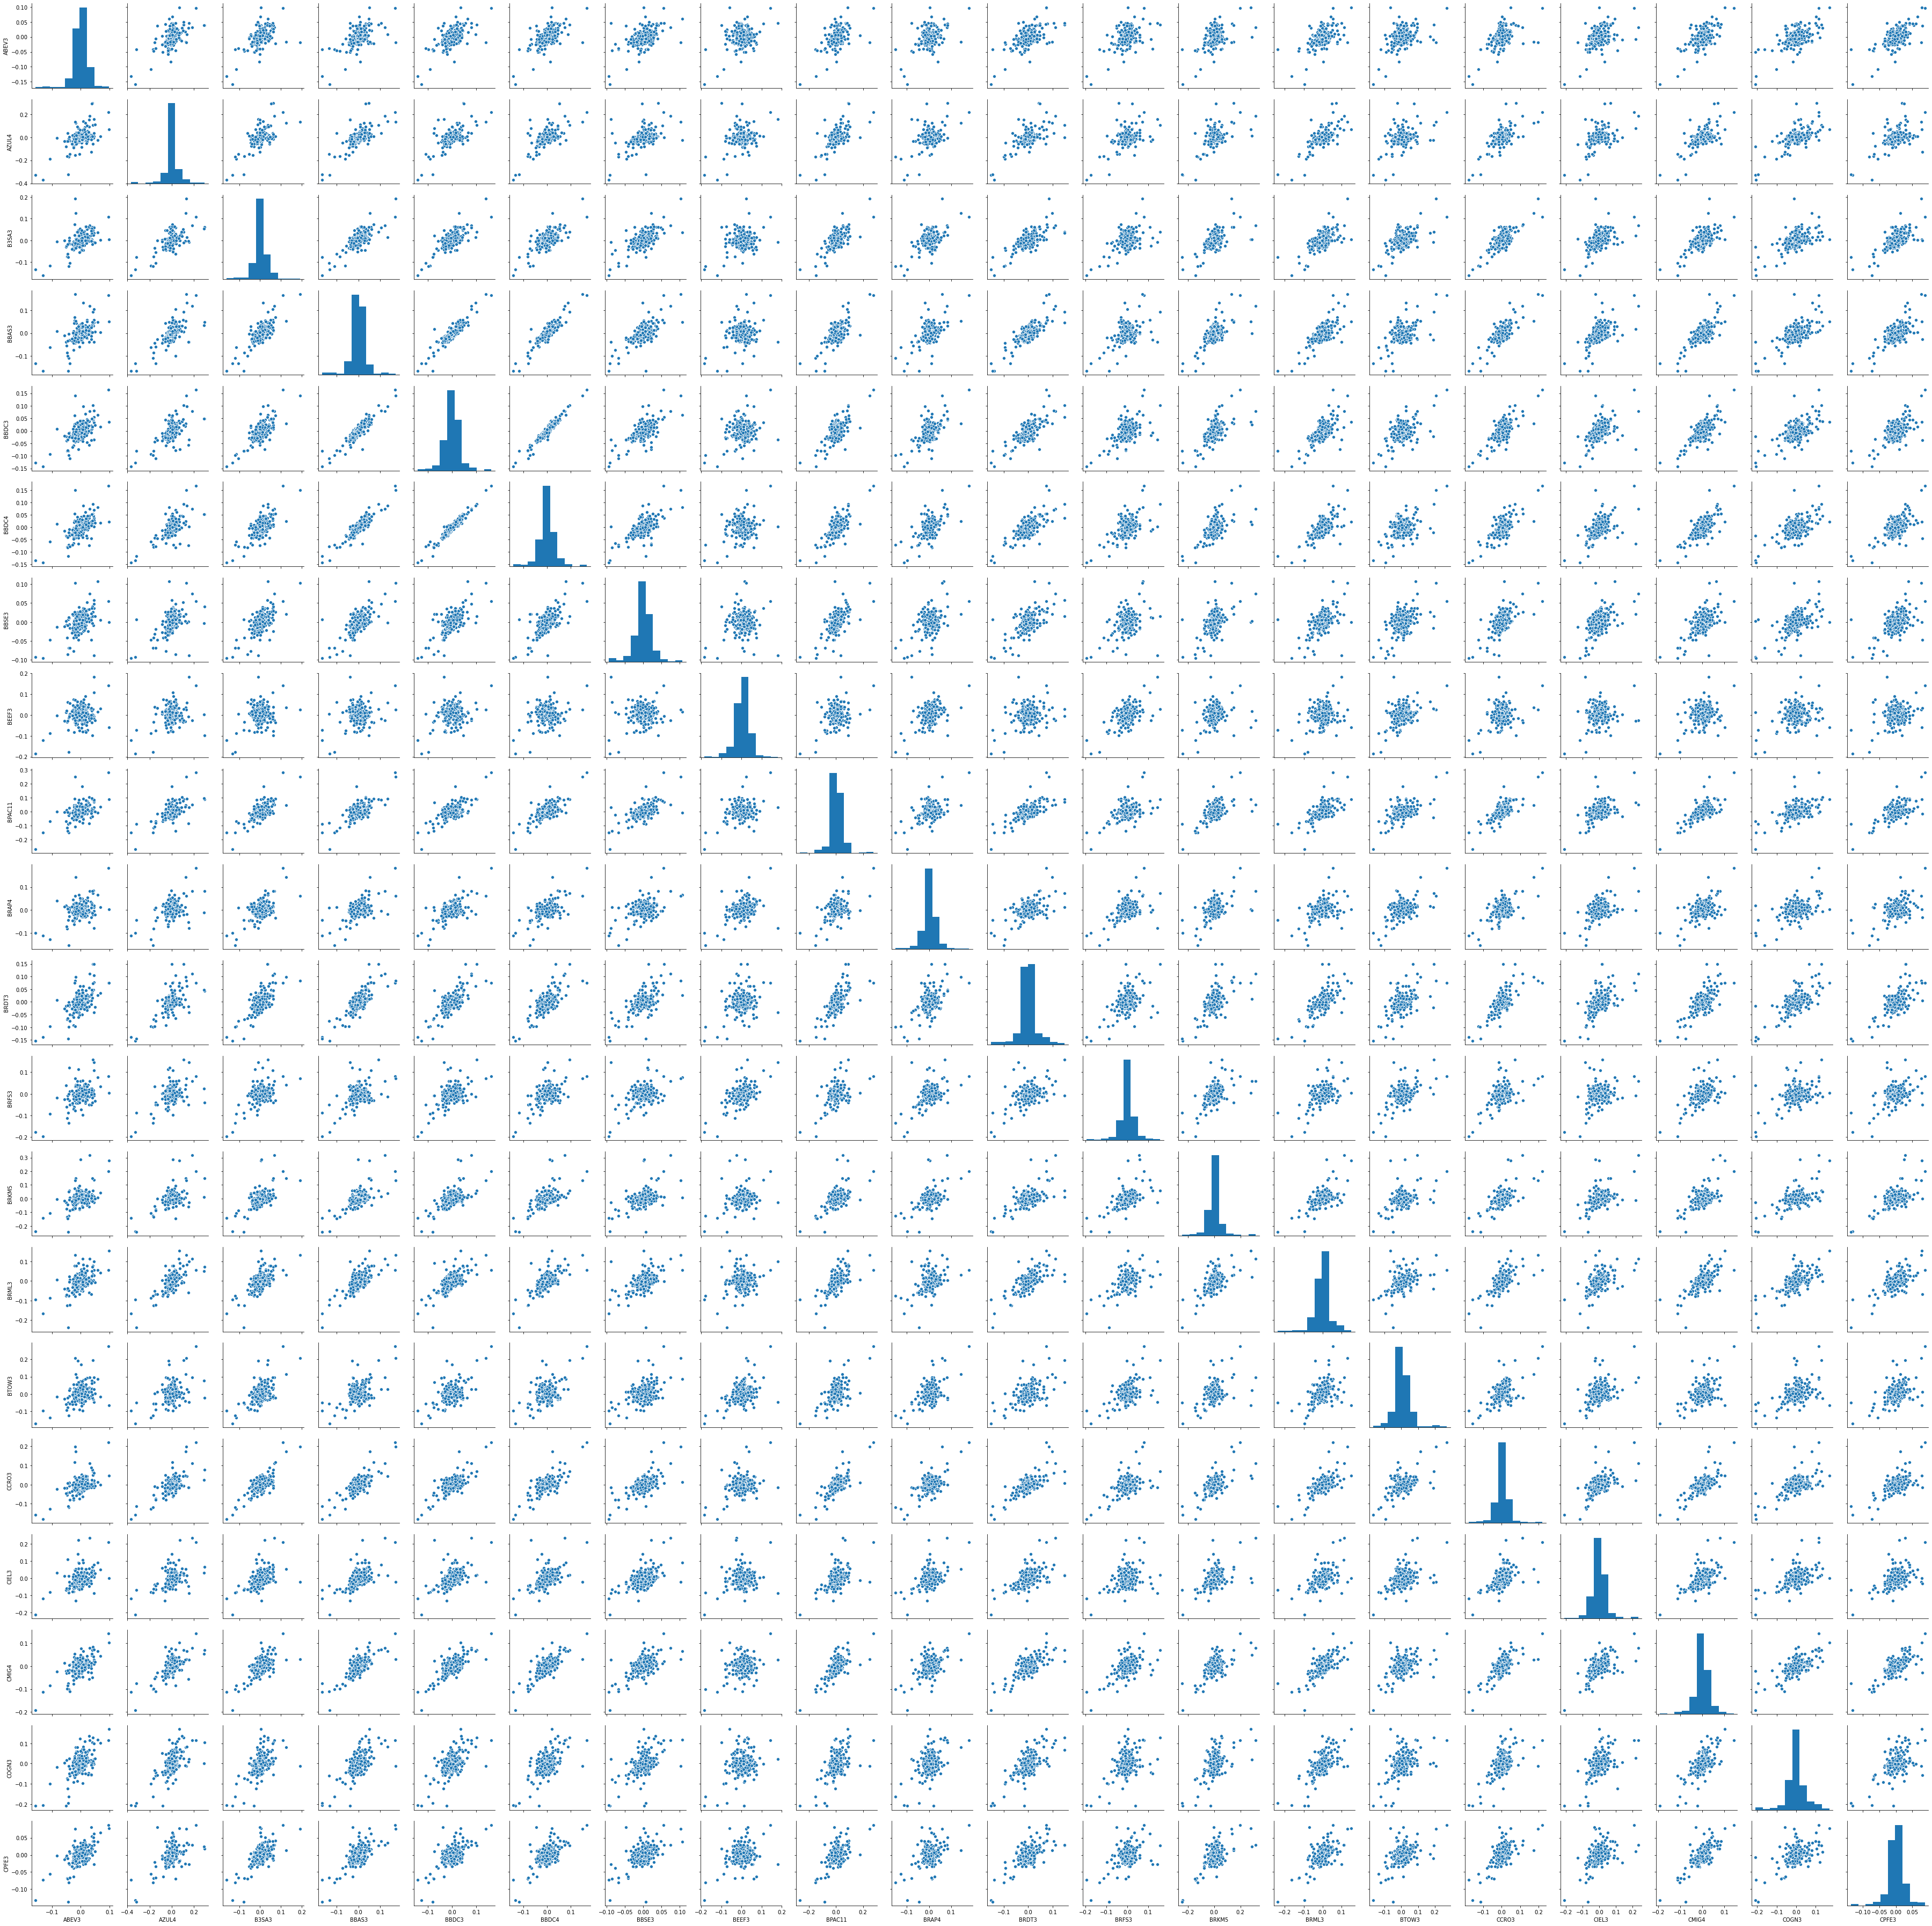

In [29]:
%matplotlib inline 
report.grafic_05(output.pct_change().dropna())